In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

##### Data

In [63]:
# ms data
file_path = 'data/cas_intensities.csv'
data = pd.read_csv(file_path, delimiter=',', index_col = 0)
# only use first repliat
data = data[data["replicate"]==1]
ms_data = data.drop(columns=["replicate"])
ms_data_array=np.array(ms_data)

In [64]:
ms_data

,6485-40-1,3033-23-6,21284-22-0,38427-78-0,495-61-4,29873-99-2,6909-30-4,99-49-0,2244-16-8,876-17-5,...,13466-78-9,483-76-1,36564-42-8,705-86-2,2825-91-4,713-95-1,20307-84-0,120021-96-7,586-62-9,710-04-3
sample_key,,,,,,,,,,,,,,,,,,,,,
000920,1.943542e+08,1.240854e+09,1.048295e+08,9.087319e+07,1.831223e+08,1.831223e+08,6.043091e+08,1.943542e+08,1.943542e+08,1.240854e+09,...,2.528854e+08,1.831223e+08,1.048295e+08,4.645706e+08,4.645706e+08,1.893777e+08,1.831223e+08,1.831223e+08,2.528854e+08,2.662124e+08
000922,1.549112e+08,1.029110e+09,1.086362e+08,1.181268e+08,1.913892e+08,1.913892e+08,6.519549e+08,1.549112e+08,1.549112e+08,1.029110e+09,...,1.875943e+08,1.913892e+08,1.086362e+08,4.505443e+08,4.505443e+08,2.602672e+08,1.913892e+08,1.913892e+08,1.875943e+08,2.698756e+08
000927,1.688820e+08,1.102763e+09,1.523761e+08,1.616408e+08,1.932470e+08,1.932470e+08,7.387225e+08,1.688820e+08,1.688820e+08,1.102763e+09,...,2.299686e+08,1.932470e+08,1.523761e+08,4.690569e+08,4.690569e+08,2.387369e+08,1.932470e+08,1.932470e+08,2.299686e+08,2.549133e+08
000911,1.759171e+08,9.992782e+08,1.654314e+08,1.787409e+08,2.531031e+08,2.531031e+08,8.800410e+08,1.759171e+08,1.759171e+08,9.992782e+08,...,2.857401e+08,2.531031e+08,1.654314e+08,4.831389e+08,4.831389e+08,3.724425e+08,2.531031e+08,2.531031e+08,2.857401e+08,3.321024e+08
000925,1.517116e+08,1.068380e+09,1.090820e+08,1.262307e+08,1.855528e+08,1.855528e+08,6.077461e+08,1.517116e+08,1.517116e+08,1.068380e+09,...,1.823817e+08,1.855528e+08,1.090820e+08,4.520255e+08,4.520255e+08,2.344530e+08,1.855528e+08,1.855528e+08,1.823817e+08,2.454637e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
000596,2.413772e+08,2.413874e+09,9.689814e+07,9.213682e+07,1.471158e+08,1.471158e+08,6.822826e+08,2.413772e+08,2.413772e+08,2.413874e+09,...,2.592504e+08,1.471158e+08,9.689814e+07,5.506742e+08,5.506742e+08,1.736489e+08,1.471158e+08,1.471158e+08,2.592504e+08,3.138085e+08
000804,3.452753e+08,3.397598e+09,1.905095e+08,2.577871e+08,2.881055e+08,2.881055e+08,1.122339e+09,3.452753e+08,3.452753e+08,3.397598e+09,...,3.308782e+08,2.881055e+08,1.905095e+08,5.763415e+08,5.763415e+08,3.355894e+08,2.881055e+08,2.881055e+08,3.308782e+08,5.460406e+08
000853,3.740657e+08,1.855998e+09,1.829394e+08,1.613276e+08,2.186666e+08,2.186666e+08,6.303671e+08,3.740657e+08,3.740657e+08,1.855998e+09,...,3.798451e+08,2.186666e+08,1.829394e+08,2.239344e+08,2.239344e+08,1.979400e+08,2.186666e+08,2.186666e+08,3.798451e+08,3.843281e+08


In [246]:
panelist_data_df = pd.read_table("data/vlb_data_combined.txt", delimiter=',', index_col = 1)
panelist_data_df = panelist_data_df[panelist_data_df["panelist"]==1]
panelist_data_df = panelist_data_df.drop(columns=["panelist", "date"])

In [245]:
# only look at same samples for comparison 
i = panelist_data_df.index.intersection(ms_data.index)

In [247]:
panelist_data_df = panelist_data_df.loc[i]
panelist_data_df

,floral,fruit,wood,complexity,malt,sweet,peat,dried_fruits,aftertaste
000656,50,20,60,50,30,30,50,40,40
000657,30,40,60,40,40,30,10,30,60
000658,30,50,50,50,40,40,10,40,70
000838,30,70,60,60,40,50,0,40,60
000839,50,60,60,60,40,50,0,30,70
...,...,...,...,...,...,...,...,...,...
000925,30,40,50,30,30,30,0,30,50
000926,50,40,50,60,40,40,50,40,60
000927,30,50,60,60,30,50,0,40,80
000929,20,70,50,50,20,30,0,40,40


In [244]:
ms_data = ms_data.loc[i]
ms_data

,6485-40-1,3033-23-6,21284-22-0,38427-78-0,495-61-4,29873-99-2,6909-30-4,99-49-0,2244-16-8,876-17-5,...,13466-78-9,483-76-1,36564-42-8,705-86-2,2825-91-4,713-95-1,20307-84-0,120021-96-7,586-62-9,710-04-3
000656,2.825842e+08,2.133618e+09,1.376122e+08,1.129117e+08,1.241942e+08,1.241942e+08,7.594208e+08,2.825842e+08,2.825842e+08,2.133618e+09,...,3.090106e+08,1.241942e+08,1.376122e+08,5.743096e+08,5.743096e+08,1.934397e+08,1.241942e+08,1.241942e+08,3.090106e+08,3.111124e+08
000657,2.490753e+08,2.387300e+09,1.174299e+08,1.045745e+08,1.101815e+08,1.101815e+08,7.396865e+08,2.490753e+08,2.490753e+08,2.387300e+09,...,2.527582e+08,1.101815e+08,1.174299e+08,5.553109e+08,5.553109e+08,1.719868e+08,1.101815e+08,1.101815e+08,2.527582e+08,2.963368e+08
000658,3.063394e+08,2.208002e+09,2.074207e+08,2.021848e+08,2.078365e+08,2.078365e+08,1.000881e+09,3.063394e+08,3.063394e+08,2.208002e+09,...,3.783629e+08,2.078365e+08,2.074207e+08,6.027752e+08,6.027752e+08,2.912135e+08,2.078365e+08,2.078365e+08,3.783629e+08,3.502243e+08
000838,3.004512e+08,1.648801e+09,3.530315e+08,2.960716e+08,3.052143e+08,3.052143e+08,5.457252e+08,3.004512e+08,3.004512e+08,1.648801e+09,...,4.299386e+08,3.052143e+08,3.530315e+08,2.109654e+08,2.109654e+08,2.575301e+08,3.052143e+08,3.052143e+08,4.299386e+08,3.679643e+08
000839,2.712269e+08,1.642697e+09,2.395558e+08,1.728214e+08,1.322088e+08,1.322088e+08,3.473576e+08,2.712269e+08,2.712269e+08,1.642697e+09,...,1.548222e+08,1.322088e+08,2.395558e+08,1.579338e+08,1.579338e+08,1.556085e+08,1.322088e+08,1.322088e+08,1.548222e+08,2.289899e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
000925,1.517116e+08,1.068380e+09,1.090820e+08,1.262307e+08,1.855528e+08,1.855528e+08,6.077461e+08,1.517116e+08,1.517116e+08,1.068380e+09,...,1.823817e+08,1.855528e+08,1.090820e+08,4.520255e+08,4.520255e+08,2.344530e+08,1.855528e+08,1.855528e+08,1.823817e+08,2.454637e+08
000926,2.098708e+08,1.160679e+09,1.302705e+08,1.397330e+08,1.562665e+08,1.562665e+08,6.194031e+08,2.098708e+08,2.098708e+08,1.160679e+09,...,2.697350e+08,1.562665e+08,1.302705e+08,4.688051e+08,4.688051e+08,2.029630e+08,1.562665e+08,1.562665e+08,2.697350e+08,2.569535e+08
000927,1.688820e+08,1.102763e+09,1.523761e+08,1.616408e+08,1.932470e+08,1.932470e+08,7.387225e+08,1.688820e+08,1.688820e+08,1.102763e+09,...,2.299686e+08,1.932470e+08,1.523761e+08,4.690569e+08,4.690569e+08,2.387369e+08,1.932470e+08,1.932470e+08,2.299686e+08,2.549133e+08
000929,1.476134e+08,1.146926e+09,8.422660e+07,9.633448e+07,1.642505e+08,1.642505e+08,5.421180e+08,1.476134e+08,1.476134e+08,1.146926e+09,...,1.378765e+08,1.642505e+08,8.422660e+07,4.556475e+08,4.556475e+08,2.463255e+08,1.642505e+08,1.642505e+08,1.378765e+08,2.683322e+08


## Normalize


In [248]:
# Standardization of the dataset before performing PCA
# Z-Transformation:  scaling the data to have a mean (average) of 0 and a standard deviation of 1.
scaler = StandardScaler()
panelist_data_df_scaled = scaler.fit_transform(panelist_data_df)
panelist_data_df_scaled = pd.DataFrame(panelist_data_df_scaled, columns=panelist_data_df.columns, index=panelist_data_df.index)
panelist_data_df_scaled

,floral,fruit,wood,complexity,malt,sweet,peat,dried_fruits,aftertaste
000656,0.725460,-1.846808,0.611278,-0.153166,-0.568623,-0.877035,1.872659,0.158705,-1.461604
000657,-0.836459,-0.471303,0.611278,-1.040625,0.413997,-0.877035,-0.100142,-0.788717,0.304874
000658,-0.836459,0.216450,-0.242777,-0.153166,0.413997,0.067096,-0.100142,0.158705,1.188114
000838,-0.836459,1.591955,0.611278,0.734294,0.413997,1.011226,-0.593342,0.158705,0.304874
000839,0.725460,0.904203,0.611278,0.734294,0.413997,1.011226,-0.593342,-0.788717,1.188114
...,...,...,...,...,...,...,...,...,...
000925,-0.836459,-0.471303,-0.242777,-1.928084,-0.568623,-0.877035,-0.593342,-0.788717,-0.578365
000926,0.725460,-0.471303,-0.242777,0.734294,0.413997,0.067096,1.872659,0.158705,0.304874
000927,-0.836459,0.216450,0.611278,0.734294,-0.568623,1.011226,-0.593342,0.158705,2.071353
000929,-1.617418,1.591955,-0.242777,-0.153166,-1.551243,-0.877035,-0.593342,0.158705,-1.461604


In [249]:
X_scaled_ms = scaler.fit_transform(ms_data)
X_scaled_ms_df = pd.DataFrame(X_scaled_ms, columns = ms_data.columns, index= ms_data.index)

In [250]:
X_scaled_ms_df

,6485-40-1,3033-23-6,21284-22-0,38427-78-0,495-61-4,29873-99-2,6909-30-4,99-49-0,2244-16-8,876-17-5,...,13466-78-9,483-76-1,36564-42-8,705-86-2,2825-91-4,713-95-1,20307-84-0,120021-96-7,586-62-9,710-04-3
000656,0.828776,0.601164,-0.344815,-0.599991,-0.602810,-0.602810,0.036329,0.828776,0.828776,0.601164,...,0.058974,-0.602810,-0.344815,1.127927,1.127927,-0.577689,-0.602810,-0.602810,0.058974,-0.035220
000657,0.288027,0.992949,-0.564351,-0.690963,-0.712312,-0.712312,-0.038655,0.288027,0.288027,0.992949,...,-0.377597,-0.712312,-0.564351,0.993178,0.993178,-0.736440,-0.712312,-0.712312,-0.377597,-0.215496
000658,1.212126,0.716044,0.414536,0.374121,0.050810,0.050810,0.953795,1.212126,1.212126,0.716044,...,0.597212,0.050810,0.414536,1.329820,1.329820,0.145833,0.050810,0.050810,0.597212,0.441981
000838,1.117105,-0.147584,1.998437,1.398576,0.811767,0.811767,-0.775642,1.117105,1.117105,-0.147584,...,0.997488,0.811767,1.998437,-1.449105,-1.449105,-0.103423,0.811767,0.811767,0.997488,0.658425
000839,0.645498,-0.157012,0.764090,0.053719,-0.540180,-0.540180,-1.529372,0.645498,0.645498,-0.157012,...,-1.137672,-0.540180,0.764090,-1.825233,-1.825233,-0.857638,-0.540180,-0.540180,-1.137672,-1.037188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
000925,-1.283176,-1.043985,-0.655156,-0.454659,-0.123325,-0.123325,-0.539984,-1.283176,-1.283176,-1.043985,...,-0.923785,-0.123325,-0.655156,0.260623,0.260623,-0.274193,-0.123325,-0.123325,-0.923785,-0.836194
000926,-0.344634,-0.901439,-0.424676,-0.307327,-0.352182,-0.352182,-0.495691,-0.344634,-0.344634,-0.901439,...,-0.245841,-0.352182,-0.424676,0.379632,0.379632,-0.507218,-0.352182,-0.352182,-0.245841,-0.696007
000927,-1.006089,-0.990884,-0.184219,-0.068278,-0.063199,-0.063199,-0.042318,-1.006089,-1.006089,-0.990884,...,-0.554466,-0.063199,-0.184219,0.381419,0.381419,-0.242492,-0.063199,-0.063199,-0.554466,-0.720900
000929,-1.349310,-0.922679,-0.925524,-0.780875,-0.289791,-0.289791,-0.789348,-1.349310,-1.349310,-0.922679,...,-1.269186,-0.289791,-0.925524,0.286312,0.286312,-0.186336,-0.289791,-0.289791,-1.269186,-0.557177


### UMAP

In [ ]:
import umap
from umap import UMAP
import sklearn.cluster as cluster

In [ ]:
standard_umap = UMAP(random_state=42).fit_transform(X_scaled)

In [ ]:
n_clusters=10
kmeans_labels = cluster.KMeans(n_clusters=n_clusters).fit_predict(X_scaled)

In [ ]:
# n_clusters = 10
plt.title("n_clusters = 10")
plt.scatter(standard_umap[:, 0], standard_umap[:, 1], c=kmeans_labels, s=1, cmap='Spectral');


In [ ]:
def plot_umap(file, n_clusters):
    standard_umap = UMAP(random_state=42).fit_transform(file)
    n_clusters=n_clusters
    kmeans_labels = cluster.KMeans(n_clusters=n_clusters).fit_predict(file)
    plt.scatter(standard_umap[:, 0], standard_umap[:, 1], c=kmeans_labels, s=0.1, cmap='Spectral');
    plt.scatter(standard_umap[:, 0], standard_umap[:, 1], c=kmeans_labels, s=1, cmap='Spectral');



In [ ]:
plt.title("n_clusters = 8")
plot_umap(X_scaled, 8)

In [ ]:
plt.title("n_clusters = 5")
plot_umap(X_scaled, 5)

In [ ]:
plt.title("n_clusters = 4")
plot_umap(X_scaled, 4)

#### analyse data 

In [ ]:
'''
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'floral', data = panelist_data_df)

plt.subplot(4,3,2)
sns.boxplot(x = 'fruit', data = panelist_data_df)

plt.subplot(4,3,3)
sns.boxplot(x = 'wood', data = panelist_data_df)

plt.subplot(4,3,4)
sns.boxplot(x = 'complexity', data = panelist_data_df)

plt.subplot(4,3,5)
sns.boxplot(x = 'malt', data = panelist_data_df)

plt.subplot(4,3,6)
sns.boxplot(x = 'sweet', data = panelist_data_df)

plt.subplot(4,3,7)
sns.boxplot(x = 'peat', data = panelist_data_df)

plt.subplot(4,3,8)
sns.boxplot(x = 'dried_fruits', data = panelist_data_df)

plt.subplot(4,3,9)
sns.boxplot(x = 'aftertaste', data = panelist_data_df)

# histogram / density plot'''

In [ ]:
plt.figure(figsize=(20, 20), dpi=200)

plt.subplot(4, 3, 1)
sns.histplot(x='floral', data=panelist_data_df)

plt.subplot(4, 3, 2)
sns.histplot(x='fruit', data=panelist_data_df)

plt.subplot(4, 3, 3)
sns.histplot(x='wood', data=panelist_data_df)

plt.subplot(4, 3, 4)
sns.histplot(x='complexity', data=panelist_data_df)

plt.subplot(4, 3, 5)
sns.histplot(x='malt', data=panelist_data_df)

plt.subplot(4, 3, 6)
sns.histplot(x='sweet', data=panelist_data_df)

plt.subplot(4, 3, 7)
sns.histplot(x='peat', data=panelist_data_df)

plt.subplot(4, 3, 8)
sns.histplot(x='dried_fruits', data=panelist_data_df)

plt.subplot(4, 3, 9)
sns.histplot(x='aftertaste', data=panelist_data_df)

plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(20, 20), dpi=200)

plt.subplot(4, 3, 1)
sns.kdeplot(x='floral', data=panelist_data_df)

plt.subplot(4, 3, 2)
sns.kdeplot(x='fruit', data=panelist_data_df)

plt.subplot(4, 3, 3)
sns.kdeplot(x='wood', data=panelist_data_df)

plt.subplot(4, 3, 4)
sns.kdeplot(x='complexity', data=panelist_data_df)

plt.subplot(4, 3, 5)
sns.kdeplot(x='malt', data=panelist_data_df)

plt.subplot(4, 3, 6)
sns.kdeplot(x='sweet', data=panelist_data_df)

plt.subplot(4, 3, 7)
sns.kdeplot(x='peat', data=panelist_data_df)

plt.subplot(4, 3, 8)
sns.kdeplot(x='dried_fruits', data=panelist_data_df)

plt.subplot(4, 3, 9)
sns.kdeplot(x='aftertaste', data=panelist_data_df)

plt.tight_layout()
plt.show()


In [ ]:
ms_data

In [ ]:
plt.figure(figsize=(20, 20), dpi=200)

plt.subplot(4, 3, 1)
sns.kdeplot(x='6485-40-1', data=ms_data)

plt.subplot(4, 3, 2)
sns.kdeplot(x='3033-23-6', data=ms_data)

plt.subplot(4, 3, 3)
sns.kdeplot(x='21284-22-0', data=ms_data)

plt.subplot(4, 3, 4)
sns.kdeplot(x='38427-78-0', data=ms_data)

plt.subplot(4, 3, 5)
sns.kdeplot(x='495-61-4', data=ms_data)

plt.subplot(4, 3, 6)
sns.kdeplot(x='29873-99-2', data=ms_data)

plt.subplot(4, 3, 7)
sns.kdeplot(x='6909-30-4', data=ms_data)

plt.subplot(4, 3, 8)
sns.kdeplot(x='99-49-0', data=ms_data)

plt.subplot(4, 3, 9)
sns.kdeplot(x='2244-16-8', data=ms_data)

plt.tight_layout()
plt.show()


### kmeans and Pca

In [103]:
from sklearn.decomposition import PCA


<AxesSubplot:>

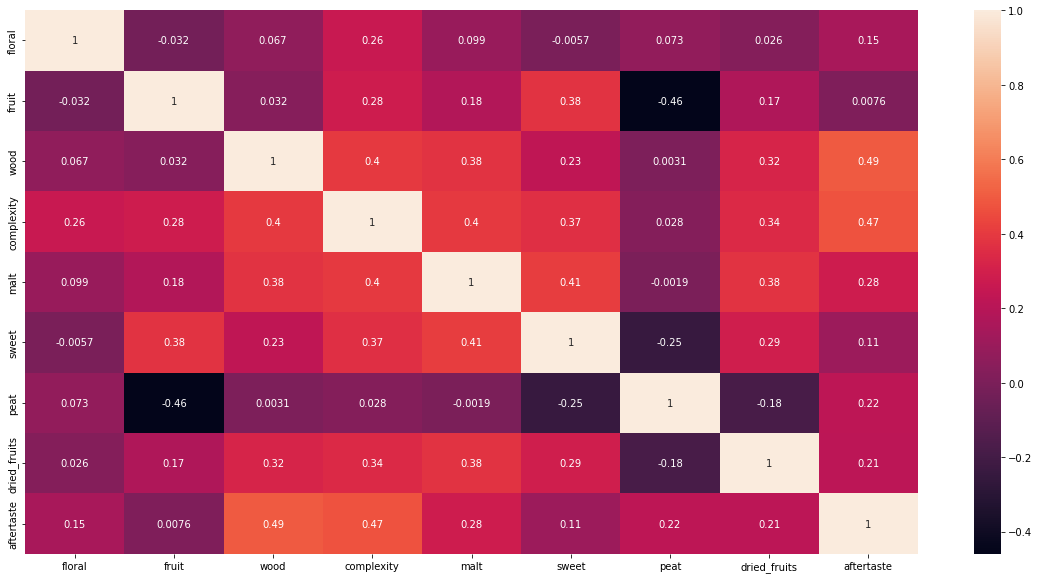

In [101]:
# Let's see the correlation matrix 
'''plt.figure(figsize = (20,10))       
sns.heatmap(panelist_data_df_scaled.corr(),annot = True)'''

In [251]:
def get_comp_pca(df):
    pca = PCA()
    pca.fit(df)
    plt.figure(figsize=(10,10))
    plt.plot(range(0,len(df.columns)), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
    plt.title('explained variance by components')
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')


In [252]:
pca = PCA()
pca.fit(panelist_data_df_scaled)
pca.explained_variance_ratio_.cumsum()

array([0.30948492, 0.49749417, 0.6292949 , 0.72900629, 0.80314055,
       0.86839219, 0.91895083, 0.9606562 , 1.        ])

Text(0, 0.5, 'cumulative explained variance')

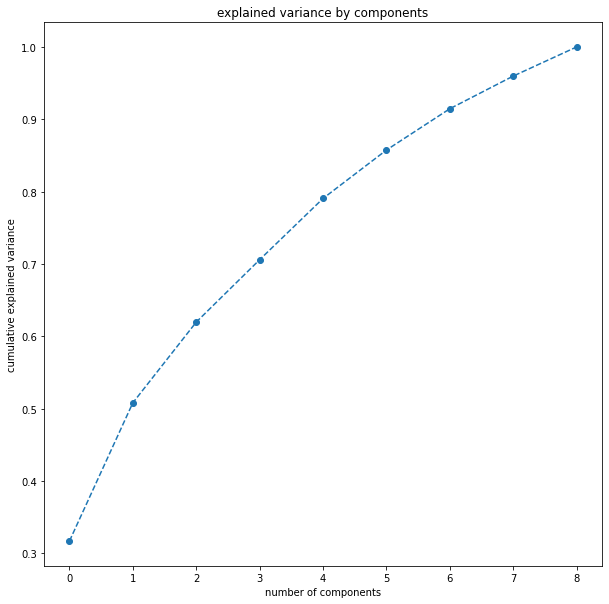

In [180]:
#  we need to decide how many features we’d like to keep based on the cumulative variance plot.
pca = PCA()
pca.fit(panelist_data_df_scaled)
plt.figure(figsize=(10,10))
plt.plot(range(0,len(panelist_data_df_scaled.columns)), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('explained variance by components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')


presereve 80 % of variance so 5 components

In [125]:
def score_pca(df,n):
    pca = PCA(n_components=n)
    pca.fit(df)
    scores_pca = pca.transform(df)
    return scores_pca

In [126]:
def find_cluster_pca(scores_pca):
    # tells how many clusters should we use? 
    wcss = []
    for i in range(1,21):
        kmeans_pca = KMeans(n_clusters=i,init = 'k-means++', random_state=42)
        kmeans_pca.fit(scores_pca)
        wcss.append(kmeans_pca.inertia_)
        plt.figure(figsize=(10,10))
    plt.plot(range(1,21), wcss, marker='o', linestyle='--')
    plt.title('K-meands with pca clustering')
    plt.xlabel('number of cluster')
    plt.ylabel('wcss')

In [292]:
def plot_cluster(df, scores_pca,title):
    # create new dataframe
    df_pca_kmeans = pd.concat([df.reset_index(drop=True), pd.DataFrame(scores_pca)], axis = 1)
    df_pca_kmeans.columns.values[-5:] = ['component 1', 'component 2', 'component 3','component 4', 'component 5']
    df_pca_kmeans['kmeans PCA'] = kmeans_pca.labels_
    df_pca_kmeans['color'] = df_pca_kmeans['kmeans PCA'].map({0: 'first', 1:'second', 2:'third', 3:'fourth'})
    x_axis = df_pca_kmeans['component 2']
    y_axis = df_pca_kmeans['component 1']
    plt.figure(figsize=(10,10))
    sns.scatterplot(x=x_axis, y=y_axis, hue=df_pca_kmeans['color'], palette=['g','r','c','m'])
    plt.title(title)
    plt.show()
    return df_pca_kmeans

In [270]:
scores_pca_panelist = score_pca(panelist_data_df_scaled, 5)

c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

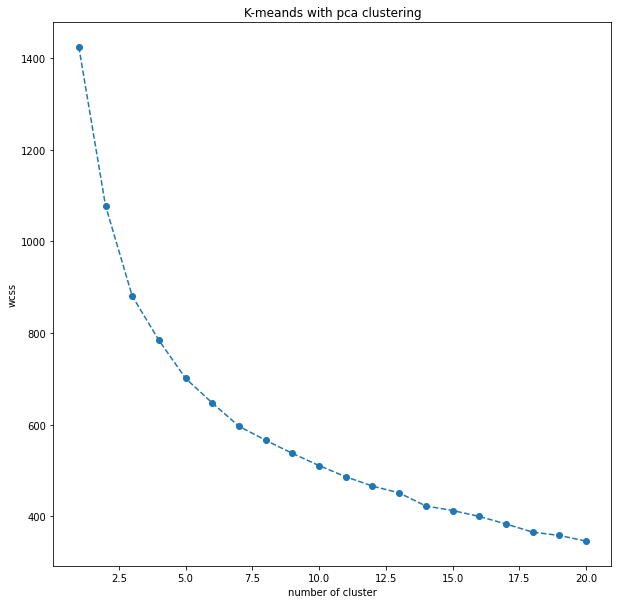

In [271]:
find_cluster_pca(scores_pca_panelist)

=> between 4 or 5 clusters

now perform pca

In [272]:
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca_panelist)

c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

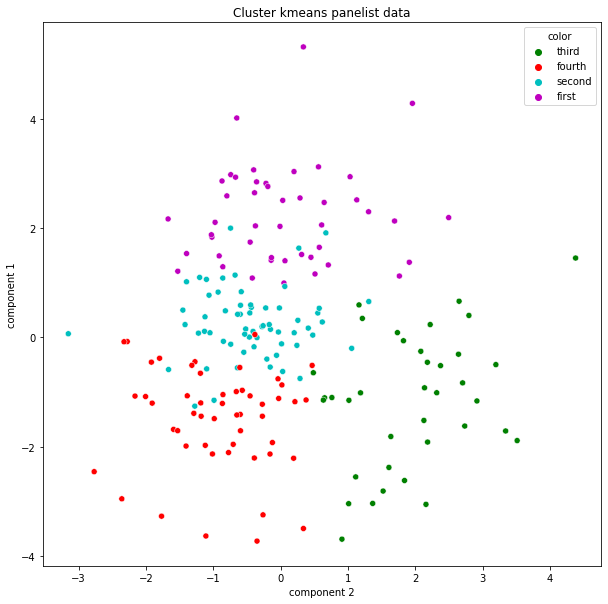

In [307]:
df_cluster_kmeans_panelist = plot_cluster(panelist_data_df_scaled, scores_pca_panelist, 'Cluster kmeans panelist data' )

In [182]:
#  we need to decide how many features we’d like to keep based on the cumulative variance plot.
pca = PCA()
pca.fit(ms_data)

PCA()

In [184]:
ms_data

,6485-40-1,3033-23-6,21284-22-0,38427-78-0,495-61-4,29873-99-2,6909-30-4,99-49-0,2244-16-8,876-17-5,...,13466-78-9,483-76-1,36564-42-8,705-86-2,2825-91-4,713-95-1,20307-84-0,120021-96-7,586-62-9,710-04-3
sample_key,,,,,,,,,,,,,,,,,,,,,
000920,1.943542e+08,1.240854e+09,1.048295e+08,9.087319e+07,1.831223e+08,1.831223e+08,6.043091e+08,1.943542e+08,1.943542e+08,1.240854e+09,...,2.528854e+08,1.831223e+08,1.048295e+08,4.645706e+08,4.645706e+08,1.893777e+08,1.831223e+08,1.831223e+08,2.528854e+08,2.662124e+08
000922,1.549112e+08,1.029110e+09,1.086362e+08,1.181268e+08,1.913892e+08,1.913892e+08,6.519549e+08,1.549112e+08,1.549112e+08,1.029110e+09,...,1.875943e+08,1.913892e+08,1.086362e+08,4.505443e+08,4.505443e+08,2.602672e+08,1.913892e+08,1.913892e+08,1.875943e+08,2.698756e+08
000927,1.688820e+08,1.102763e+09,1.523761e+08,1.616408e+08,1.932470e+08,1.932470e+08,7.387225e+08,1.688820e+08,1.688820e+08,1.102763e+09,...,2.299686e+08,1.932470e+08,1.523761e+08,4.690569e+08,4.690569e+08,2.387369e+08,1.932470e+08,1.932470e+08,2.299686e+08,2.549133e+08
000911,1.759171e+08,9.992782e+08,1.654314e+08,1.787409e+08,2.531031e+08,2.531031e+08,8.800410e+08,1.759171e+08,1.759171e+08,9.992782e+08,...,2.857401e+08,2.531031e+08,1.654314e+08,4.831389e+08,4.831389e+08,3.724425e+08,2.531031e+08,2.531031e+08,2.857401e+08,3.321024e+08
000925,1.517116e+08,1.068380e+09,1.090820e+08,1.262307e+08,1.855528e+08,1.855528e+08,6.077461e+08,1.517116e+08,1.517116e+08,1.068380e+09,...,1.823817e+08,1.855528e+08,1.090820e+08,4.520255e+08,4.520255e+08,2.344530e+08,1.855528e+08,1.855528e+08,1.823817e+08,2.454637e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
000596,2.413772e+08,2.413874e+09,9.689814e+07,9.213682e+07,1.471158e+08,1.471158e+08,6.822826e+08,2.413772e+08,2.413772e+08,2.413874e+09,...,2.592504e+08,1.471158e+08,9.689814e+07,5.506742e+08,5.506742e+08,1.736489e+08,1.471158e+08,1.471158e+08,2.592504e+08,3.138085e+08
000804,3.452753e+08,3.397598e+09,1.905095e+08,2.577871e+08,2.881055e+08,2.881055e+08,1.122339e+09,3.452753e+08,3.452753e+08,3.397598e+09,...,3.308782e+08,2.881055e+08,1.905095e+08,5.763415e+08,5.763415e+08,3.355894e+08,2.881055e+08,2.881055e+08,3.308782e+08,5.460406e+08
000853,3.740657e+08,1.855998e+09,1.829394e+08,1.613276e+08,2.186666e+08,2.186666e+08,6.303671e+08,3.740657e+08,3.740657e+08,1.855998e+09,...,3.798451e+08,2.186666e+08,1.829394e+08,2.239344e+08,2.239344e+08,1.979400e+08,2.186666e+08,2.186666e+08,3.798451e+08,3.843281e+08


Text(0, 0.5, 'cumulative explained variance')

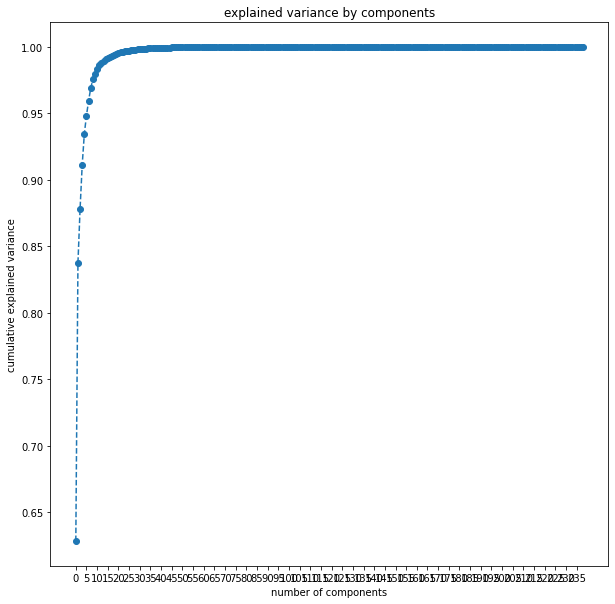

In [211]:
#  we need to decide how many features we’d like to keep based on the cumulative variance plot.
pca = PCA()
pca.fit(ms_data)
plt.figure(figsize=(10,10))
plt.plot(range(0,len(ms_data.index)), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xticks(range(0,len(ms_data.index),5))
plt.title('explained variance by components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')


~ 5 components

c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

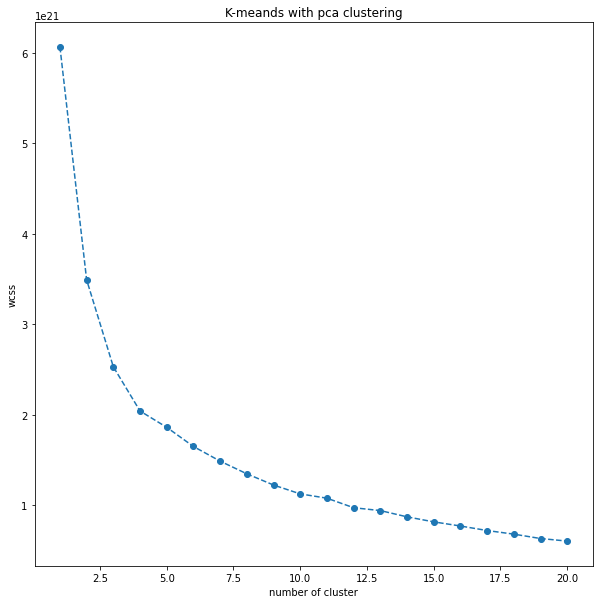

In [309]:
scores_pca_ms = score_pca(ms_data, 5)
find_cluster_pca(scores_pca_ms)


In [310]:
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca_ms)

c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

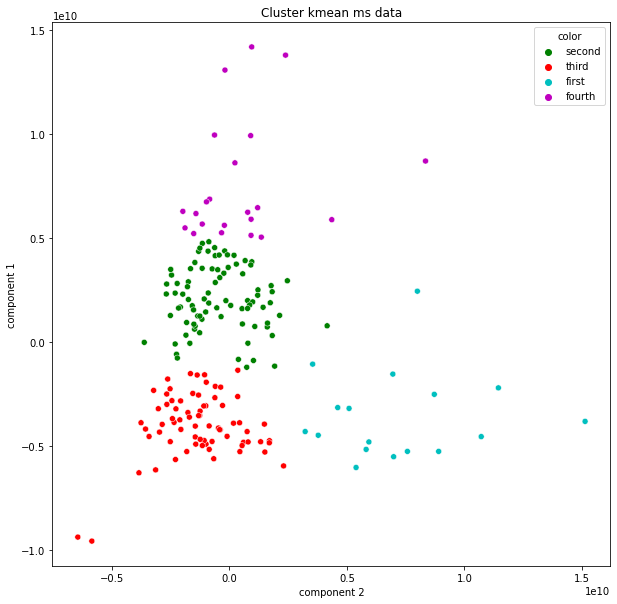

In [311]:
df_cluster_kmeans_ms = plot_cluster(ms_data, scores_pca_ms,'Cluster kmean ms data' )

### TSNE

In [274]:
from sklearn.manifold import TSNE

In [276]:
TSNE_panelist = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(panelist_data_df_scaled)
kmeans_tsne = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_tsne.fit(TSNE_panelist)


c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [277]:
# create new dataframe
df_TSNE_panelist = pd.concat([panelist_data_df_scaled.reset_index(drop=True),  pd.DataFrame(TSNE_panelist)],axis=1)
df_TSNE_panelist.columns.values[-2:] = ['component 1', 'component 2']
df_TSNE_panelist['kmeans TSNE'] = kmeans_tsne.labels_
df_TSNE_panelist

,floral,fruit,wood,complexity,malt,sweet,peat,dried_fruits,aftertaste,component 1,component 2,kmeans TSNE
0,0.725460,-1.846808,0.611278,-0.153166,-0.568623,-0.877035,1.872659,0.158705,-1.461604,-20.815998,15.437322,2
1,-0.836459,-0.471303,0.611278,-1.040625,0.413997,-0.877035,-0.100142,-0.788717,0.304874,-10.847814,-2.757325,0
2,-0.836459,0.216450,-0.242777,-0.153166,0.413997,0.067096,-0.100142,0.158705,1.188114,5.163534,1.851357,1
3,-0.836459,1.591955,0.611278,0.734294,0.413997,1.011226,-0.593342,0.158705,0.304874,-0.437638,-23.321634,0
4,0.725460,0.904203,0.611278,0.734294,0.413997,1.011226,-0.593342,-0.788717,1.188114,-10.937291,-33.180317,0
...,...,...,...,...,...,...,...,...,...,...,...,...
192,-0.836459,-0.471303,-0.242777,-1.928084,-0.568623,-0.877035,-0.593342,-0.788717,-0.578365,-2.065841,39.984520,1
193,0.725460,-0.471303,-0.242777,0.734294,0.413997,0.067096,1.872659,0.158705,0.304874,-50.589123,25.648096,2
194,-0.836459,0.216450,0.611278,0.734294,-0.568623,1.011226,-0.593342,0.158705,2.071353,2.778884,-34.246952,0
195,-1.617418,1.591955,-0.242777,-0.153166,-1.551243,-0.877035,-0.593342,0.158705,-1.461604,12.037805,10.482877,1


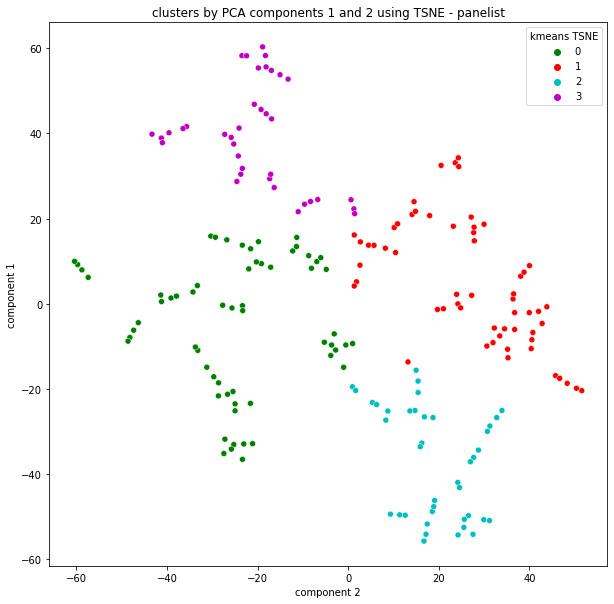

In [283]:
x_axis = df_TSNE_panelist['component 2']
y_axis = df_TSNE_panelist['component 1']
plt.figure(figsize=(10,10))
sns.scatterplot(x=x_axis, y=y_axis, data=df_TSNE_panelist, hue = df_TSNE_panelist['kmeans TSNE'], palette=['g','r','c','m'])
plt.title('clusters by PCA components 1 and 2 using TSNE - panelist')
plt.show()

In [279]:
X_ms_TSNE = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(ms_data)
kmeans_tsne = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_tsne.fit(X_ms_TSNE)
# create new dataframe
df_ms_TSNE = pd.concat([ms_data.reset_index(drop=True),  pd.DataFrame(X_ms_TSNE)],axis=1)

c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [280]:
df_ms_TSNE.columns.values[-2:] = ['component 1', 'component 2']
df_ms_TSNE['kmeans TSNE'] = kmeans_tsne.labels_

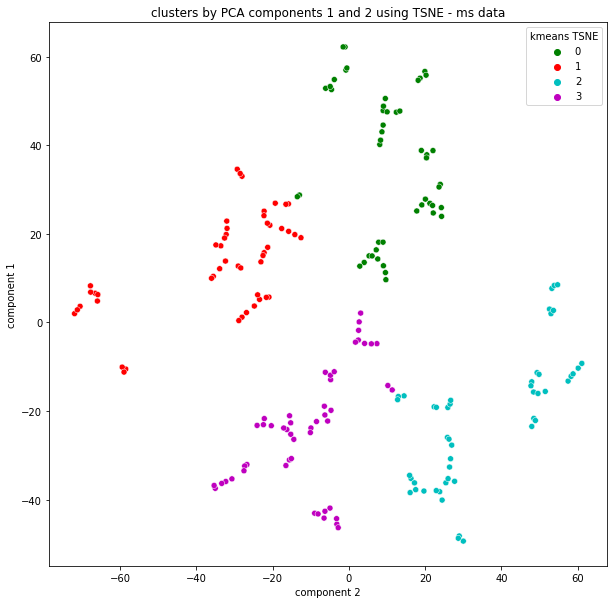

In [284]:
x_axis = df_ms_TSNE['component 2']
y_axis = df_ms_TSNE['component 1']
plt.figure(figsize=(10,10))
sns.scatterplot(x=x_axis, y=y_axis, data=df_ms_TSNE, hue = df_ms_TSNE['kmeans TSNE'], palette=['g','r','c','m'])
plt.title('clusters by PCA components 1 and 2 using TSNE - ms data')
plt.show()

## Fuzzy approach

In [285]:
import skfuzzy as fuzz


panelist

In [304]:
# Define the number of clusters
k = 4

# Apply fuzzy c-means clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    panelist_data_df_scaled.T, k, 2, error=0.005, maxiter=1000, init=None
)

# Extract the cluster labels
cluster_labels = np.argmax(u, axis=0)

# Print the cluster labels
print(cluster_labels)



[2 2 1 1 1 3 2 1 3 3 3 1 3 1 1 1 1 1 1 1 2 1 3 0 3 0 2 1 2 1 3 2 2 2 2 2 2
 2 3 1 2 3 1 2 2 1 2 1 1 1 0 2 1 2 1 2 2 0 2 2 2 2 1 3 3 2 1 2 2 1 2 3 1 3
 2 0 2 2 3 2 1 2 2 2 1 2 2 3 2 2 1 2 1 2 2 1 2 1 1 1 1 2 1 1 2 1 0 3 1 2 1
 1 3 2 1 2 1 3 1 2 2 2 3 1 1 2 1 3 1 2 2 1 1 1 1 1 1 1 2 1 2 2 1 3 3 2 1 2
 2 2 2 2 1 1 2 3 2 2 1 2 2 2 1 2 2 2 1 2 1 2 3 2 2 2 3 2 2 2 1 1 1 1 1 3 2
 1 1 1 1 1 2 3 2 3 1 2 1]


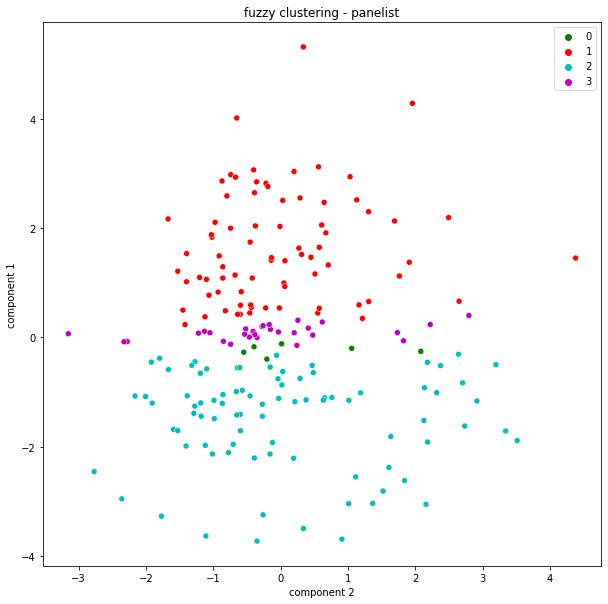

In [305]:
x_axis = df_cluster_kmeans_panelist['component 2']
y_axis = df_cluster_kmeans_panelist['component 1']
plt.figure(figsize=(10,10))
sns.scatterplot(x=x_axis, y=y_axis, hue=cluster_labels, palette=['g','r','c','m'])
plt.title('fuzzy clustering - panelist')
plt.show()

[ 7  7 10  4  4 11  7  4 10 10 10  4 10  4  4 10  4 10  4 10  7 10 10  1
  2  3  7 10  7 10 10  7  7  7  7  7  7  7  5  4  7 10 10  7  7  4  7  4
  4  4  1  7  4  7  4  7  7  3  7  7  9  7 10 11  5  7  4  7  7  4  7 11
  4 11  7  1  7  7 11  7  4  7  7  7  4  7  7 10  7  7 10  6  4  7  7  4
  7 10  4  4  4  7  4 10  7  4  9 11  4  7  4  4 11  7  4  7  4 11  4  7
  7  7 11  4  4  7  4 10  4  7  6  4  4  4  4  4  4 10  7 10  7  7 10  5
 11  7  4  7  7  7  7  7  4  4  7 11  7  7  4  7  7  7  4  7  7  7 10  7
  4  7 10  7  7  7 10  7  7  7  4  4 10  4 10  8  7  4  4  4  4  4  7 10
  7 11  4  7  4]


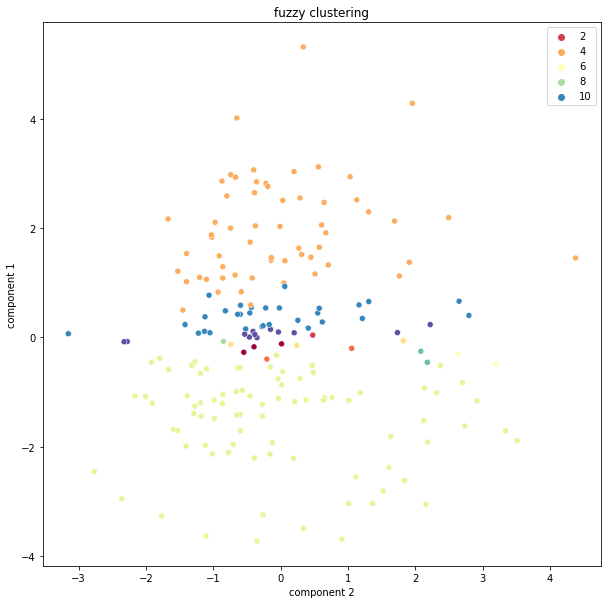

In [300]:

# Define the number of clusters
k = 12

# Apply fuzzy c-means clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    panelist_data_df_scaled.T, k, 2, error=0.005, maxiter=1000, init=None
)

# Extract the cluster labels
cluster_labels = np.argmax(u, axis=0)

# Print the cluster labels
print(cluster_labels)


x_axis = df_cluster_kmeans_panelist['component 2']
y_axis = df_cluster_kmeans_panelist['component 1']
plt.figure(figsize=(10,10))
sns.scatterplot(x=x_axis, y=y_axis, hue=cluster_labels, palette='Spectral')
plt.title('fuzzy clustering')
plt.show()

[2 2 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 1 1 2 0 2 0 0 2 2 2 2 2 2
 2 1 0 2 0 0 2 2 0 2 0 0 0 1 2 0 2 0 2 2 1 2 2 2 2 0 1 1 2 0 2 2 0 2 1 0 1
 2 1 2 2 1 2 0 2 2 2 0 2 2 0 2 2 0 2 0 2 2 0 2 0 0 0 0 2 0 0 2 0 1 0 0 2 0
 0 1 2 0 2 0 1 0 2 2 2 1 0 0 2 0 0 0 2 2 0 0 0 0 0 0 0 2 0 2 2 0 1 1 2 0 2
 2 2 2 2 0 0 2 1 2 2 0 2 2 2 0 2 2 2 0 2 0 2 0 2 2 2 0 2 2 2 0 0 0 0 0 1 2
 0 0 0 0 0 2 0 2 1 0 2 0]


C:\Users\Franz\AppData\Local\Temp\ipykernel_21476\2419063405.py:17: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x=x_axis, y=y_axis, hue=cluster_labels, palette=(['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']))


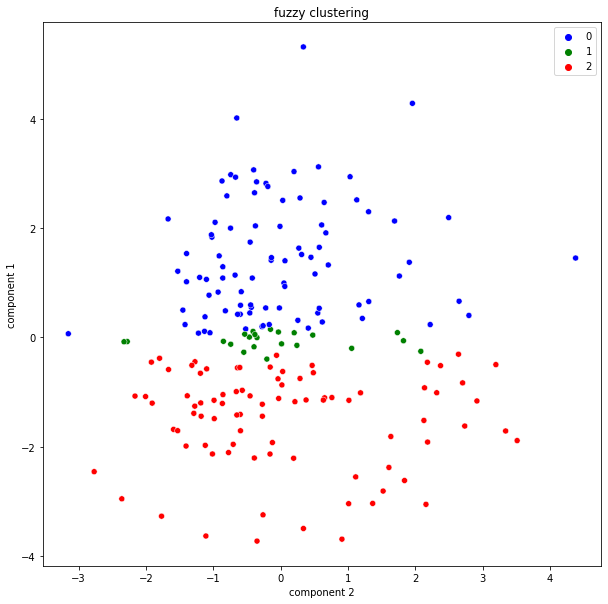

In [301]:
# Define the number of clusters
k = 3

# Apply fuzzy c-means clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    panelist_data_df_scaled.T, k, 2, error=0.005, maxiter=1000, init=None
)

# Extract the cluster labels
cluster_labels = np.argmax(u, axis=0)

# Print the cluster labels
print(cluster_labels)
x_axis = df_cluster_kmeans_panelist['component 2']
y_axis = df_cluster_kmeans_panelist['component 1']
plt.figure(figsize=(10,10))
sns.scatterplot(x=x_axis, y=y_axis, hue=cluster_labels, palette=(['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']))
plt.title('fuzzy clustering')
plt.show()


ms data

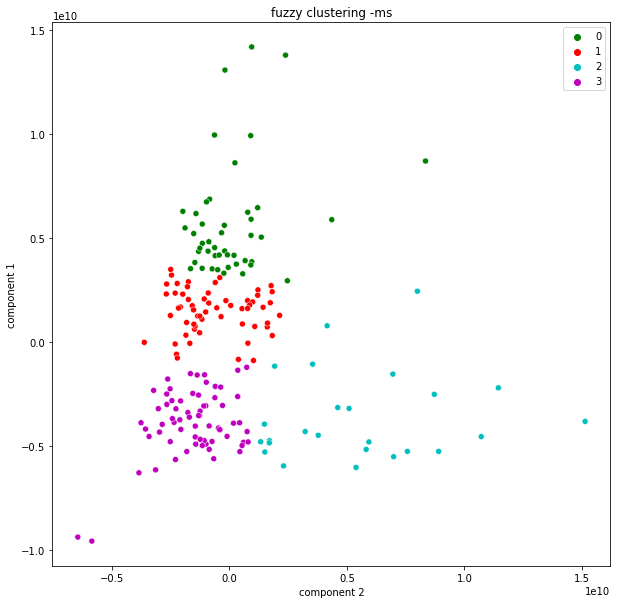

In [306]:
# Define the number of clusters
k = 4

# Apply fuzzy c-means clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    ms_data.T, k, 2, error=0.005, maxiter=1000, init=None
)

# Extract the cluster labels
cluster_labels = np.argmax(u, axis=0)

# Print the cluster labels
#print(cluster_labels)

x_axis = df_cluster_kmeans_ms['component 2']
y_axis = df_cluster_kmeans_ms['component 1']
plt.figure(figsize=(10,10))
sns.scatterplot(x=x_axis, y=y_axis, hue=cluster_labels, palette=['g','r','c','m'])
plt.title('fuzzy clustering -ms')
plt.show()

### Chat GPT dataset

In [ ]:
chat_gpt_data = pd.read_table("data/csv_WBS_CahtData_professional_HH.csv", delimiter=';')
chat_gpt_data.columns = ["Whisky Name","floral", 'fruit', 'wood', 'complexity' , 'malt' ,'sweet', 'peat', 'dried_fruits', 'aftertaste' ]
X_gpt = chat_gpt_data.drop('Whisky Name',axis = 1)  
y_gpt = chat_gpt_data['Whisky Name']

scaler = StandardScaler()
X_gpt_scaled = scaler.fit_transform(X_gpt)

##### Compare flavors

In [ ]:
plt.figure(figsize=(25,25), dpi=200)
plt.suptitle("Compare ChatGPT (blue) with panelist data (red) ", size = 16)

plt.subplot(4,3,1)
sns.histplot(x = 'floral', data = chat_gpt_data)
sns.histplot(x = 'floral', data = panelist_data_df, color="r")

plt.subplot(4,3,2)
sns.histplot(x = 'fruit', data = chat_gpt_data)
sns.histplot(x = 'fruit', data = panelist_data_df, color="r")

plt.subplot(4,3,3)
sns.histplot(x = 'wood', data = chat_gpt_data)
sns.histplot(x = 'wood', data = panelist_data_df, color="r")

plt.subplot(4,3,4)
sns.histplot(x = 'complexity', data = chat_gpt_data)
sns.histplot(x = 'complexity', data = panelist_data_df, color="r")

plt.subplot(4,3,5)
sns.histplot(x = 'malt', data = chat_gpt_data)
sns.histplot(x = 'malt', data = panelist_data_df, color="r")

plt.subplot(4,3,6)
sns.histplot(x = 'sweet', data = chat_gpt_data)
sns.histplot(x = 'sweet', data = panelist_data_df, color="r")

plt.subplot(4,3,7)
sns.histplot(x = 'peat', data = chat_gpt_data)
sns.histplot(x = 'peat', data = panelist_data_df, color="r")

plt.subplot(4,3,8)
sns.histplot(x = 'dried_fruits', data = chat_gpt_data)
sns.histplot(x = 'dried_fruits', data = panelist_data_df, color="r")

plt.subplot(4,3,9)
sns.histplot(x = 'aftertaste', data = chat_gpt_data)
sns.histplot(x = 'aftertaste', data = panelist_data_df, color="r")



plt.show()

In [ ]:
X_scaled_gpt = pd.DataFrame(X_gpt_scaled,columns=X_gpt.columns)
X_scaled_gpt.head()	

In [ ]:
'''# perform pca
pca = PCA()
pca.fit(X_scaled_gpt)
#  we need to decide how many features we’d like to keep based on the cumulative variance plot.
# plt.figure(figsize=(10,10))
plt.plot(range(1,10), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('explained variance by components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
# presereve 80 % of variance so 5 components
pca = PCA(n_components=5)
pca.fit(X_scaled_gpt)
scores_pca = pca.transform(X_scaled_gpt)
# how many clusters should we use? 
wcss = []
for i in range(1,21):
    kmeans_pca = KMeans(n_clusters=i,init = 'k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

plt.figure(figsize=(10,10))
plt.plot(range(1,21), wcss, marker='o', linestyle='--')
plt.title('K-means with pca clustering')
plt.xlabel('number of cluster')
plt.ylabel('wcss')
#  => between 4 or 5 clusters'''

In [ ]:
pca = PCA(n_components=5)
pca.fit(X_scaled_gpt)
scores_pca_gpt = pca.transform(X_scaled_gpt)
kmeans_pca_gpt = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_pca_gpt.fit(scores_pca_gpt)

In [ ]:
# create new dataframe
gpt_pca_kmeans = pd.concat([X_scaled_gpt.reset_index(drop=True), pd.DataFrame(scores_pca_gpt)], axis = 1)
gpt_pca_kmeans.columns.values[-5:] = ['component 1', 'component 2', 'component 3','component 4', 'component 5']
gpt_pca_kmeans['kmeans PCA'] = kmeans_pca_gpt.labels_
gpt_pca_kmeans['color'] = gpt_pca_kmeans['kmeans PCA'].map({0: 'first', 1:'second', 2:'third', 3:'fourth'})

In [ ]:
x_axis = gpt_pca_kmeans['component 2']
y_axis = gpt_pca_kmeans['component 1']
plt.figure(figsize=(10,10))
sns.scatterplot(x=x_axis, y=y_axis, hue=gpt_pca_kmeans['color'], palette=['g','r','c','m'])
plt.title('chat gpt clusters by PCA components 1 and 2')
plt.show()

In [ ]:
X_TSNE_gpt = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(X_scaled_gpt)
kmeans_tsne_gpt = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_tsne_gpt.fit(X_TSNE_gpt)

In [ ]:
gpt_TSNE = pd.concat([X_scaled_gpt.reset_index(drop=True),  pd.DataFrame(X_TSNE_gpt)],axis=1)
gpt_TSNE.columns.values[-2:] = ['component 1', 'component 2']
gpt_TSNE['kmeans TSNE'] = kmeans_tsne_gpt.labels_
gpt_TSNE['Whisky Name'] = chat_gpt_data['Whisky Name']
gpt_TSNE

In [ ]:
x_axis = gpt_TSNE['component 2']
y_axis = gpt_TSNE['component 1']
plt.figure(figsize=(10,10))
sns.scatterplot(x=x_axis, y=y_axis, data=gpt_TSNE, hue = gpt_TSNE['kmeans TSNE'], palette=['g','r','c','m'])
plt.title('clusters by PCA components 1 and 2 using TSNE')
plt.show()

#### check differences between panelists

In [ ]:
'''with open('panelist_1.txt', 'w') as f:
    for line in lines :
        if line.startswith('1'):
            f.write(line)

with open('panelist_2.txt', 'w') as f:
    for line in lines :
        if line.startswith('2'):
            f.write(line)

with open('panelist_3.txt', 'w') as f:
    for line in lines :
        if line.startswith('3'):
            f.write(line)'''

In [ ]:
'''panelist_1 = np.loadtxt("data/panelist_1.txt", delimiter=',',  skiprows=1, usecols=range(2, 11))
panelist_2 = np.loadtxt("data/panelist_2.txt", delimiter=',',  skiprows=1, usecols=range(2, 11))
panelist_3 = np.loadtxt("data/panelist_3.txt", delimiter=',',  skiprows=1, usecols=range(2, 11))
# -> Filter for  key of sample
plt.title("panelist 1")
plot_umap(panelist_1, 8)
plt.title("panelist 2")
plot_umap(panelist_2, 8)
plt.title("panelist 3")
plot_umap(panelist_3, 8)'''